# Dynamics of scalar-modulated system

Dynamics equation:

$\dot{x}(x, t) = u(t)w(x) + v_0(x); \;\; x(0) = 0$

## Candidate recipe for stabilizing through scalar modulation:

Choose $u(t)$ fluctuating approx on timescale of expected timing errors to correct.

Pick any $w(x^*(t))$ same sign as $du/dt(t)$ for all $t$.

Pick $v_0(x^*(t))$ s.t. $\dot{x}^*(t) = u(t)w(x^*(t)) + v_0(x^*(t))$ for all $t$.

## Example solutions

Sinusoidal modulation:

$x^*(t) = t$

$u(t) = 1 + cos(t)$

$w(x) = -sin(x)$

$v_0(x) = [1 + sin(x)]cos(x)$

Generally sufficient solution:

Let $x^*(t) = t$.

Choose $u(t)$ that fluctuates in time around 1.

$w(x) = W\frac{du(t)}{dt}\big \rvert_{t=x} \quad \quad W > 0$

$v_0(x) = 1-w(x)u(t)|_{t=x}$

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import sys

from aux import Generic, get_idx
from disp import set_font_size

# Model trajectory generation

In [2]:
DT = .01
DX = .01

DN = 10  # factor to multiply by to get downsampled arrays

T_MAX = 32
X_MAX = 32

T_STOP = 30

TAU_ETA = 1
SGM_0 = .4
SGM = SGM_0/np.sqrt(DT)

T_MOD = 2*np.pi

N_TR = 300

W_SCALE = .75

# Basic analysis

In [3]:
data_dict = np.load(f'trj_set_t_stop_{T_STOP}_sgm_0_{SGM_0}_tau_eta_{TAU_ETA}_t_mod_{T_MOD:.3f}_n_tr_{N_TR}.npy', allow_pickle=True)[0]
locals().update(data_dict)

Min: 0.026, Max: 1.974, Std: 0.459


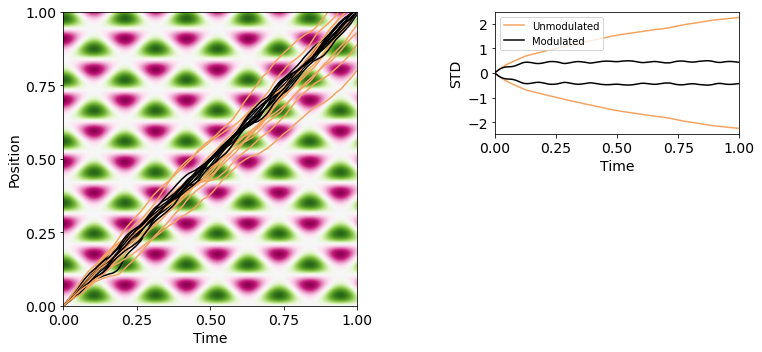

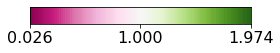

In [4]:
N_TR_SHOW = 10
TICKS = np.array([0, .25, .5, .75, 1])

t2v = w_arr_dn[:, None] @ u_arr_dn[None, :] + np.tile(v0_arr_dn[:, None], (1, len(u_arr_dn)))
v_diff_u = t2v.max() - 1
v_diff_l = 1 - t2v.min()

if v_diff_u > v_diff_l:
    v_min = 1 - v_diff_u
    v_max = 1 + v_diff_u
else:
    v_min = 1 - v_diff_l
    v_max = 1 + v_diff_l

fig = plt.figure(figsize=(15, 5), tight_layout=True)
gs = gridspec.GridSpec(2, 4)
axs = np.array([
    fig.add_subplot(gs[:, :2]),  # speed landscape & example trajectories
    fig.add_subplot(gs[0, 2]),  # modulation time course
])

# speed landscape and trajectories
axs[0].imshow(t2v, origin='lower', cmap='PiYG', vmin=v_min, vmax=v_max, extent=[0, T_MAX/T_STOP, 0, X_MAX/T_STOP])

axs[0].plot([0, T_MAX/T_STOP], [0, T_MAX/T_STOP], c='gray', ls='--')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Position')
print('Min: {0:.3f}, Max: {1:.3f}, Std: {2:.3f}'.format(v_min, v_max, t2v.std()))

for x_tr, x_tr_ctl in zip(x_trs[:N_TR_SHOW], x_trs_ctl[:N_TR_SHOW]):
    
    axs[0].plot(t_smln/T_STOP, x_tr/T_STOP, c='k')
    axs[0].plot(t_smln/T_STOP, x_tr_ctl/T_STOP, c='sandybrown')

axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_xticks(TICKS)
axs[0].set_yticks(TICKS)

axs[1].plot(t_smln/T_STOP, x_trs_ctl.std(0), c='sandybrown')
axs[1].plot(t_smln/T_STOP, x_trs.std(0), c='k')
axs[1].plot(t_smln/T_STOP, -x_trs_ctl.std(0), c='sandybrown')
axs[1].plot(t_smln/T_STOP, -x_trs.std(0), c='k')
axs[1].set_xlim(0, 1)
axs[1].set_xticks(TICKS)

axs[1].set_xlabel('Time')
axs[1].set_ylabel('STD')
axs[1].legend(['Unmodulated', 'Modulated'], loc='upper left')

set_font_size(axs, 14, legend_font_size=10)

fig.savefig('ms/4ab.svg')

# colorbar
fig, ax = plt.subplots(1, 1, figsize=(4, .8), tight_layout=True)
ax.matshow(np.linspace(v_min, v_max, 100)[None, :], origin='lower', vmin=v_min, vmax=v_max, cmap='PiYG',
           extent=[v_min, v_max, 0, .15])
ax.set_xticks([v_min, 1, v_max])
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)

set_font_size(ax, 16)

## Segment duration correlation analysis

..

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Use

..

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Use

..

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


.

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator


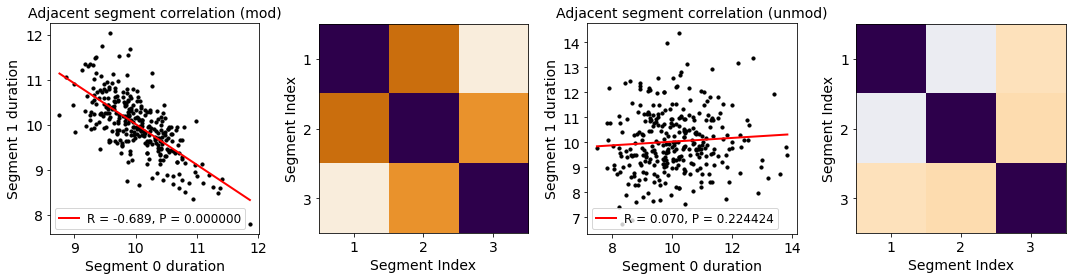

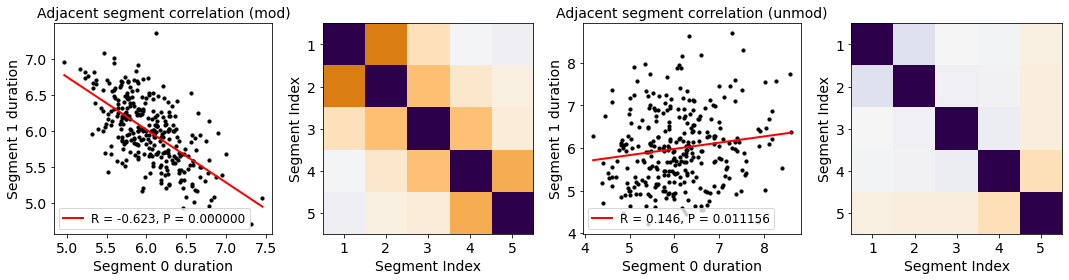

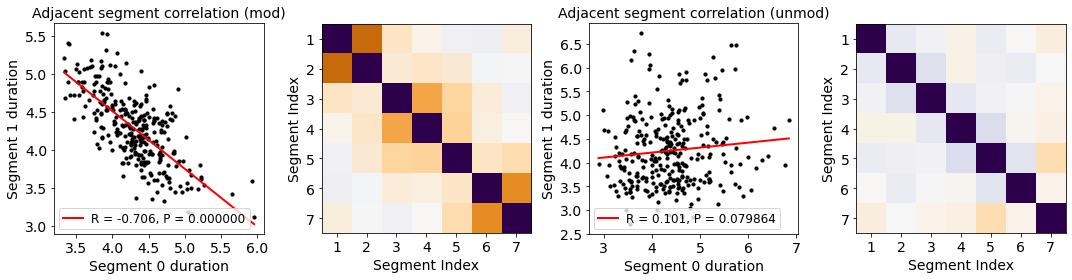

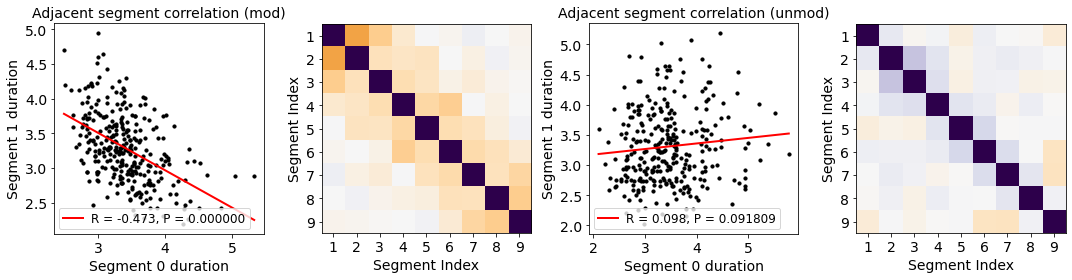

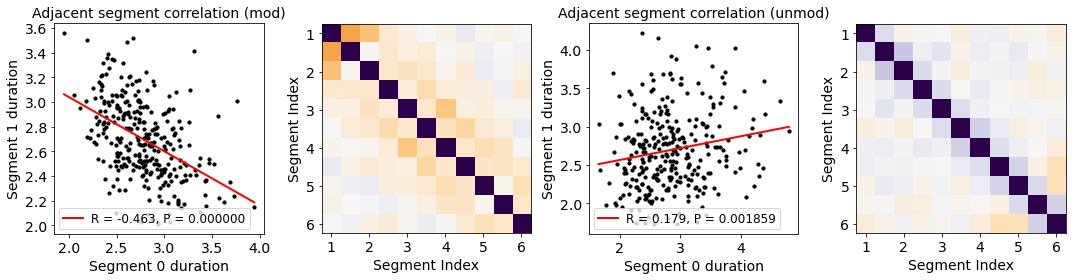

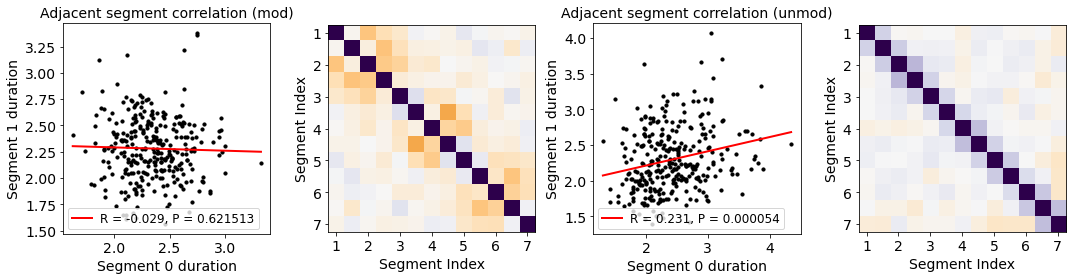

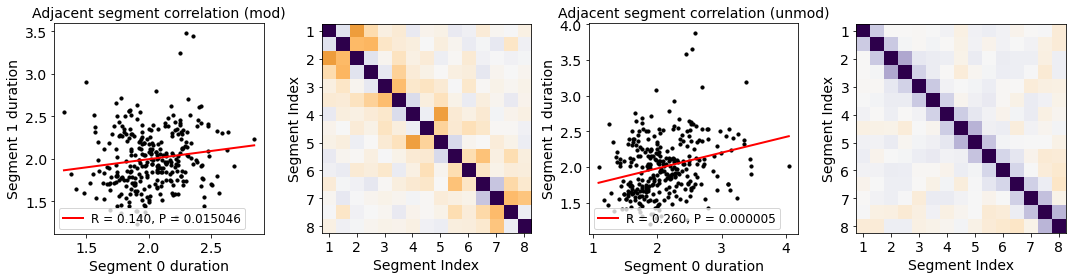

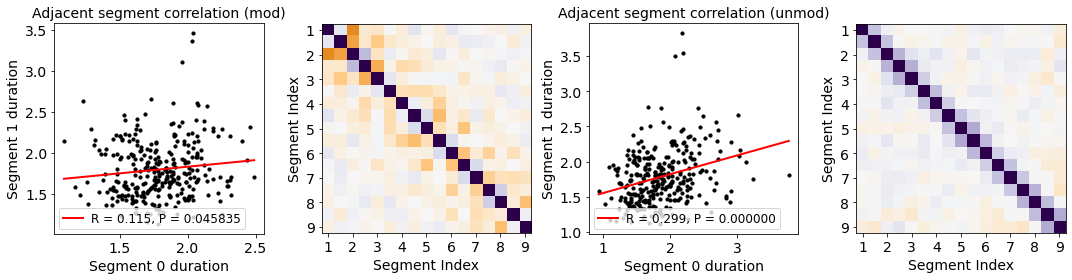

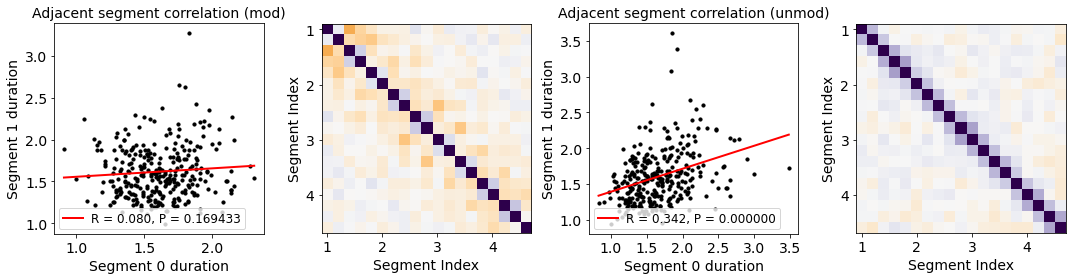

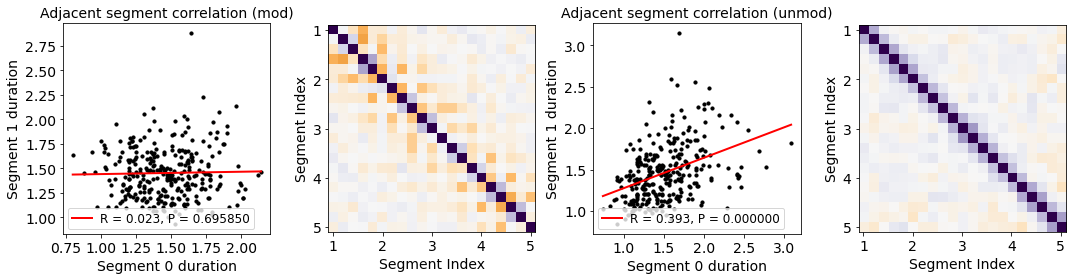

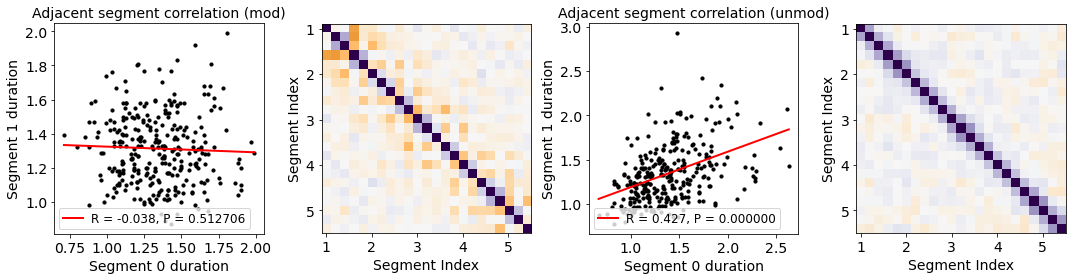

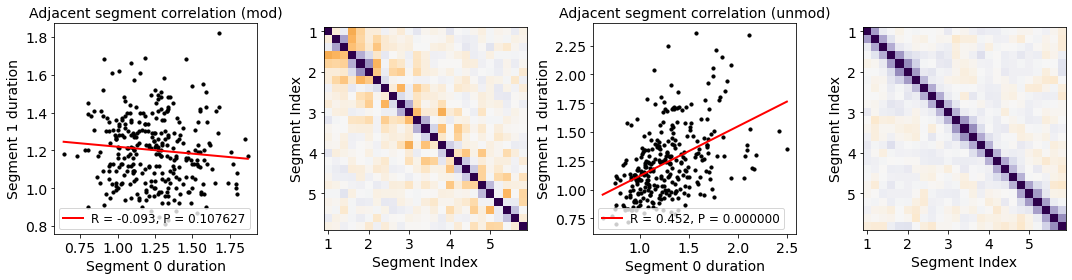

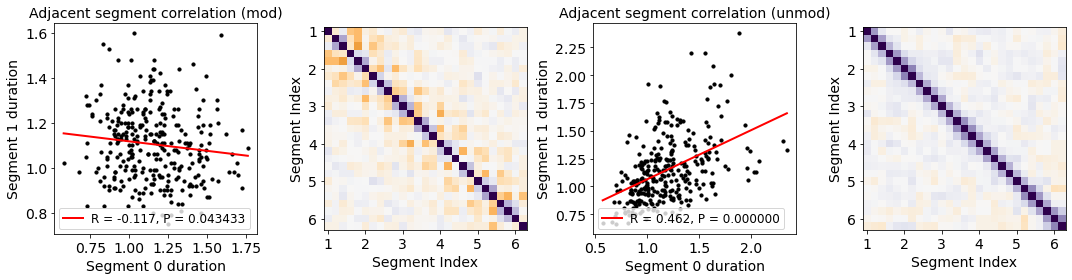

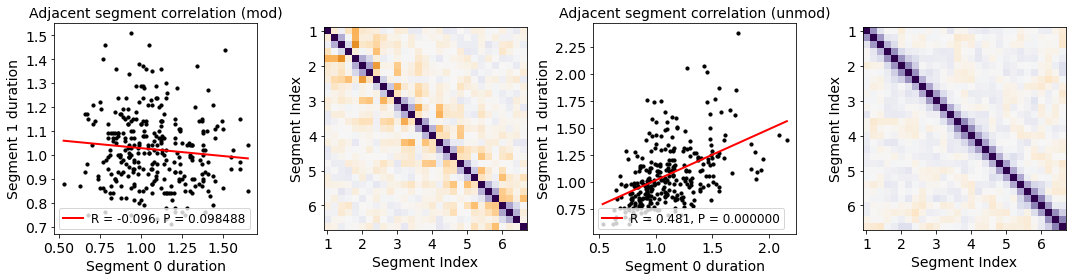

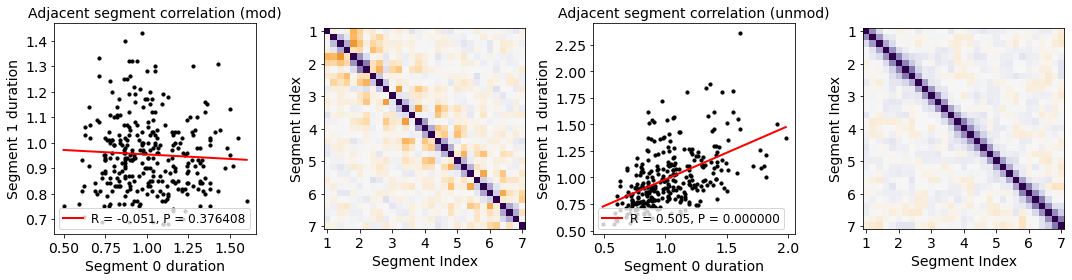

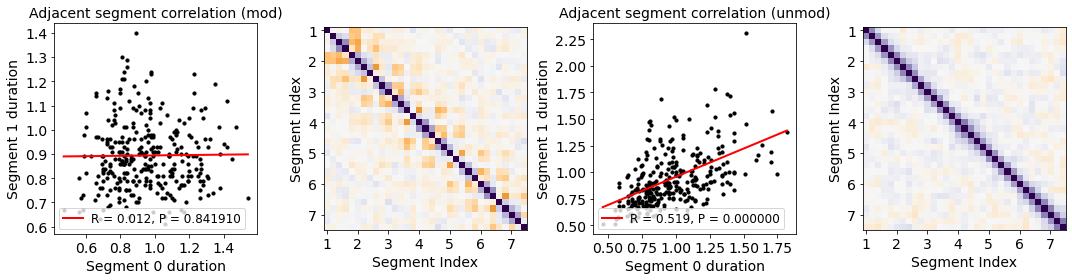

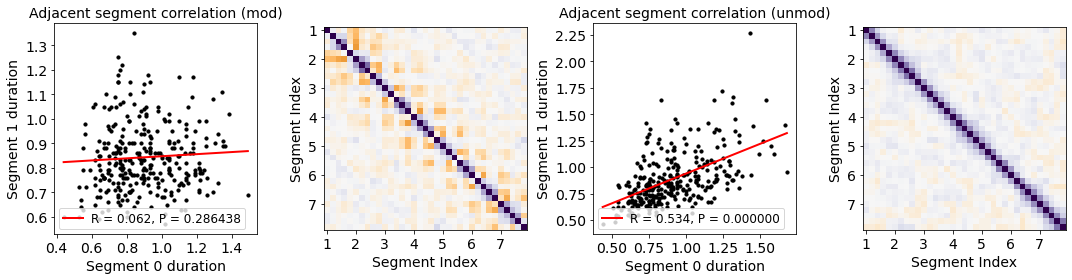

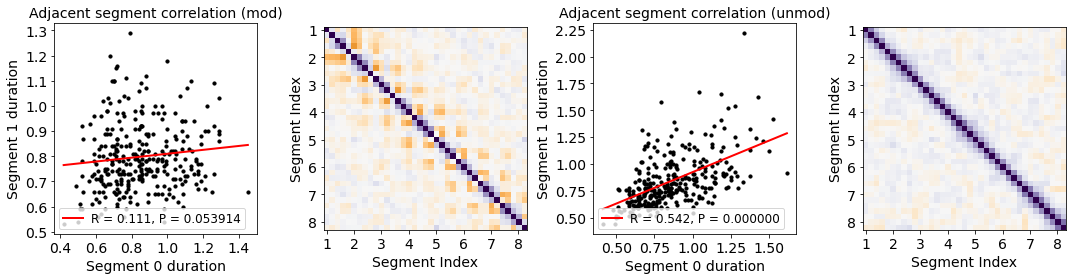

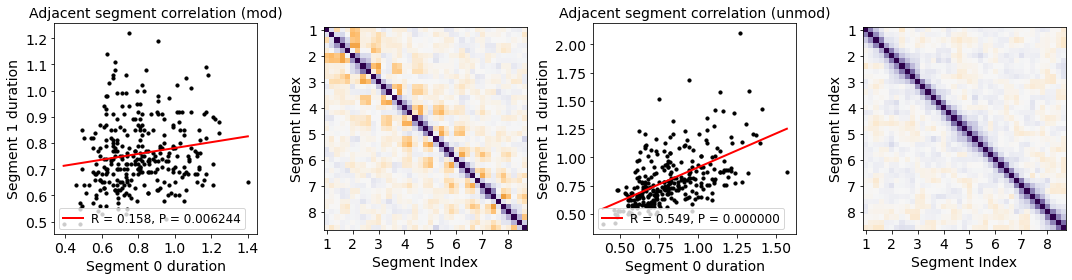

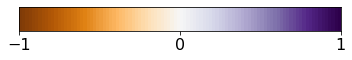

In [5]:
from itertools import product as cprod
from scipy import stats

IXPL_SAVE = 1
NSEGS = np.arange(3, 40, 2)

r_mns = np.nan * np.zeros(len(NSEGS))
r_mns_ctl = np.nan * np.zeros(len(NSEGS))
p_mns = np.nan * np.zeros(len(NSEGS))
p_mns_ctl = np.nan * np.zeros(len(NSEGS))

for cnseg, nseg in enumerate(NSEGS):
    sys.stdout.write('.')
    # analyze "syllable" durations
    x_bds = np.linspace(0, T_STOP, nseg+1)
    t_bds = np.nan*np.zeros((N_TR, len(x_bds)))  # times at which x boundaries were reached in modulated trials
    t_bds[:, 0] = 0

    t_bds_ctl = np.nan*np.zeros((N_TR, len(x_bds)))  # times at which x boundaries were reached in unmodulated trials
    t_bds_ctl[:, 0] = 0

    for cx_tr, (x_tr, x_tr_ctl) in enumerate(zip(x_trs, x_trs_ctl)):
        for cx_bd, x_bd in enumerate(x_bds[1:], 1):
            # modulated trial
            if x_bd <= x_tr[-1]:
                t_bd = DT*np.nonzero(x_bd < x_tr)[0][0]
            else:
                t_bd = np.nan
            t_bds[cx_tr, cx_bd] = t_bd

            # unmodulated trial
            if x_bd <= x_tr_ctl[-1]:
                t_bd_ctl = DT*np.nonzero(x_bd < x_tr_ctl)[0][0]
            else:
                t_bd_ctl = np.nan
            t_bds_ctl[cx_tr, cx_bd] = t_bd_ctl

    syl_durs = np.diff(t_bds, axis=1)
    syl_durs_ctl = np.diff(t_bds_ctl, axis=1)

    n_syl = syl_durs.shape[1]

    # calc lin fits and slopes for all pairs of syllable durations
    slps = np.nan * np.zeros((n_syl, n_syl))
    icpts = np.nan * np.zeros((n_syl, n_syl))
    rs = np.nan * np.zeros((n_syl, n_syl))
    ps = np.nan * np.zeros((n_syl, n_syl))

    slps_ctl = np.nan * np.zeros((n_syl, n_syl))
    icpts_ctl = np.nan * np.zeros((n_syl, n_syl))
    rs_ctl = np.nan * np.zeros((n_syl, n_syl))
    ps_ctl = np.nan * np.zeros((n_syl, n_syl))


    for csyl_0, csyl_1 in cprod(range(n_syl), range(n_syl)):
        # modulated trials
        durs_0 = syl_durs[:, csyl_0]
        durs_1 = syl_durs[:, csyl_1]

        mvalid = (~np.isnan(durs_0)) & (~np.isnan(durs_1))
        slp, icpt, r, p, _ = stats.linregress(durs_0[mvalid], durs_1[mvalid])
        slps[csyl_0, csyl_1] = slp
        icpts[csyl_0, csyl_1] = icpt
        rs[csyl_0, csyl_1] = r
        ps[csyl_0, csyl_1] = p

        # unmodulated control trials
        durs_0_ctl = syl_durs_ctl[:, csyl_0]
        durs_1_ctl = syl_durs_ctl[:, csyl_1]

        mvalid_ctl = (~np.isnan(durs_0_ctl)) & (~np.isnan(durs_1_ctl))
        slp_ctl, icpt_ctl, r_ctl, p_ctl, _ = stats.linregress(durs_0_ctl[mvalid_ctl], durs_1_ctl[mvalid_ctl])
        slps_ctl[csyl_0, csyl_1] = slp_ctl
        icpts_ctl[csyl_0, csyl_1] = icpt_ctl
        rs_ctl[csyl_0, csyl_1] = r_ctl
        ps_ctl[csyl_0, csyl_1] = p_ctl

    r_mns[cnseg] = np.nanmean(np.diagonal(rs, 1))
    r_mns_ctl[cnseg] = np.nanmean(np.diagonal(rs_ctl, 1))
    
    p_mns[cnseg] = np.nanmean(np.diagonal(ps, 1))
    p_mns_ctl[cnseg] = np.nanmean(np.diagonal(ps_ctl, 1))
    
    SHOW_IDXS = (0, 1)  # which syllable durations to make example plots for
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 4), tight_layout=True)
    
    syl_durs_0 = syl_durs[:, SHOW_IDXS[0]]
    syl_durs_1 = syl_durs[:, SHOW_IDXS[1]]
    slp = slps[SHOW_IDXS[0], SHOW_IDXS[1]]
    icpt = icpts[SHOW_IDXS[0], SHOW_IDXS[1]]
    r = rs[SHOW_IDXS[0], SHOW_IDXS[1]]
    p = ps[SHOW_IDXS[0], SHOW_IDXS[1]]

    xs_line = np.array([syl_durs_0.min(), syl_durs_0.max()])
    ys_line = slp*xs_line + icpt

    axs[0].plot(xs_line, ys_line, c='r', lw=2)

    axs[0].scatter(syl_durs_0, syl_durs_1, s=10, c='k')
    axs[0].set_xlabel(f'Segment {SHOW_IDXS[0]} duration')
    axs[0].set_ylabel(f'Segment {SHOW_IDXS[1]} duration')
    axs[0].set_title(f'Adjacent segment correlation (mod)')

    axs[0].legend([f'R = {r:.3f}, P = {p:.6f}'], loc='lower left')

    axs[1].matshow(rs, vmin=-1, vmax=1, cmap='PuOr')
    axs[1].set_xticklabels(np.arange(len(x_bds)))
    axs[1].set_yticklabels(np.arange(len(x_bds)))
    axs[1].set_xlabel('Segment Index')
    axs[1].set_ylabel('Segment Index')
    axs[1].xaxis.tick_bottom()

    syl_durs_0_ctl = syl_durs_ctl[:, SHOW_IDXS[0]]
    syl_durs_1_ctl = syl_durs_ctl[:, SHOW_IDXS[1]]
    slp_ctl = slps_ctl[SHOW_IDXS[0], SHOW_IDXS[1]]
    icpt_ctl = icpts_ctl[SHOW_IDXS[0], SHOW_IDXS[1]]
    r_ctl = rs_ctl[SHOW_IDXS[0], SHOW_IDXS[1]]
    p_ctl = ps_ctl[SHOW_IDXS[0], SHOW_IDXS[1]]

    xs_line_ctl = np.array([syl_durs_0_ctl.min(), syl_durs_0_ctl.max()])
    ys_line_ctl = slp_ctl*xs_line_ctl + icpt_ctl

    axs[2].plot(xs_line_ctl, ys_line_ctl, c='r', lw=2)

    axs[2].scatter(syl_durs_0_ctl, syl_durs_1_ctl, s=10, c='k')
    axs[2].set_xlabel(f'Segment {SHOW_IDXS[0]} duration')
    axs[2].set_ylabel(f'Segment {SHOW_IDXS[1]} duration')
    axs[2].set_title(f'Adjacent segment correlation (unmod)')

    axs[2].legend([f'R = {r_ctl:.3f}, P = {p_ctl:.6f}'], loc='lower left')

    axs[3].matshow(rs_ctl, vmin=-1, vmax=1, cmap='PuOr')
    axs[3].set_xticklabels(np.arange(len(x_bds)))
    axs[3].set_yticklabels(np.arange(len(x_bds)))
    axs[3].set_xlabel('Segment Index')
    axs[3].set_ylabel('Segment Index')
    axs[3].xaxis.tick_bottom()

    set_font_size(axs, 14, legend_font_size=12)
    
    if cnseg == IXPL_SAVE:
        fig.savefig('ms/4de.svg')


# colorbar
fig, ax = plt.subplots(1, 1, figsize=(5, 1), tight_layout=True)
ax.matshow(np.linspace(-1, 1, 100)[None, :], origin='lower', vmin=-1, vmax=1, cmap='PuOr',
           extent=[-1, 1, 0, .15])
ax.set_xticks([-1, 0, 1])
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)

set_font_size(ax, 16)

fig.savefig('ms/4eCBAR.svg')

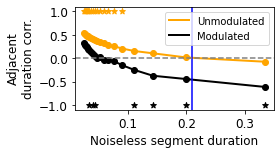

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.25), tight_layout=True)
ax.plot(1/NSEGS, r_mns_ctl, c='orange', lw=2)
ax.plot(1/NSEGS, r_mns, c='k', lw=2)

ax.scatter(1/NSEGS, r_mns_ctl, c='orange')
ax.scatter(1/NSEGS, r_mns, c='k')

p_scatter_ctl = np.nan * np.zeros(len(NSEGS))
p_scatter_ctl[p_mns_ctl < .05] = 1
ax.scatter(1/NSEGS, p_scatter_ctl, marker='*', c='orange')

p_scatter = np.nan * np.zeros(len(NSEGS))
p_scatter[p_mns < .05] = -1
ax.scatter(1/NSEGS, p_scatter, marker='*', c='k')

ax.axvline(T_MOD/T_STOP, c='b')
ax.axhline(0, color='gray', ls='--')
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('Noiseless segment duration')
ax.set_ylabel('Adjacent\nduration corr.')
ax.legend(['Unmodulated', 'Modulated'])

set_font_size(ax, 12, legend_font_size=10)

fig.savefig('ms/4c.svg')